**CIFAR 10 DATASET WITH PYTORCH**

In [3]:
import torch
print(torch.__version__)

2.1.0+cu121


IMPORTING LIBRARIES

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [5]:
from tensorflow.keras import models, layers, datasets

LOADING DATASET

In [6]:
(x_train, y_train), (x_test, y_test)= datasets.cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [7]:
x_train.shape

(50000, 32, 32, 3)

In [8]:
x_test.shape

(10000, 32, 32, 3)

EXPLORATION OF DATASET

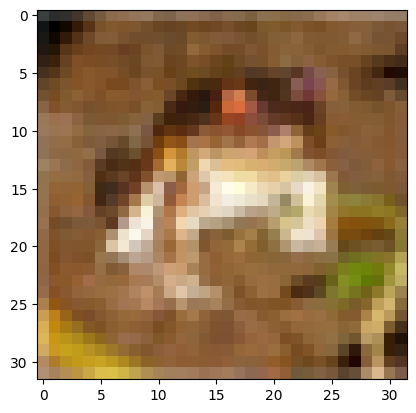

In [9]:
plt.imshow(x_train[0])

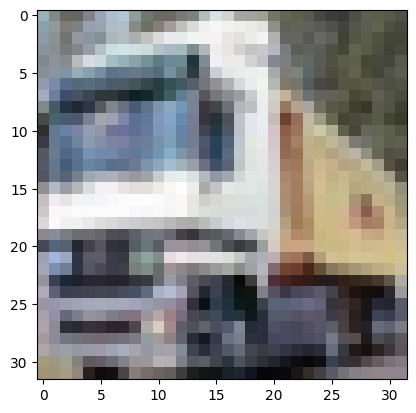

In [10]:
plt.imshow(x_train[1])

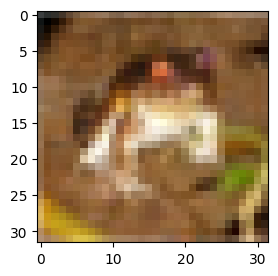

In [11]:
plt.figure(figsize=(15,3))
plt.imshow(x_train[0])

In [12]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [13]:
y_train=y_train.reshape(-1,)

In [14]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [15]:
classes=["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [16]:
def plot_sample(x,y,index):
  plt.figure(figsize=(15,3))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

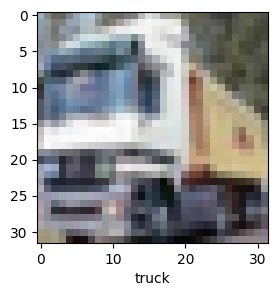

In [17]:
plot_sample(x_train, y_train, 1)

NORMALIZATION OF DATASET

In [18]:
x_train = x_train/255
x_test = x_test/255

BUILDING AN ARTIFICIAL NEURAL NETWORK

In [19]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy', #sparse_categorical_crossentropy is used for when the value is a number and categorical_crossentropy is used when we have 1 hot encoded values.
            metrics=['accuracy'])
ann.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 9s 5ms/step - loss: 1.8122 - accuracy: 0.3560
Epoch 2/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6218 - accuracy: 0.4283
Epoch 3/5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5409 - accuracy: 0.4554
Epoch 4/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4825 - accuracy: 0.4784
Epoch 5/5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4323 - accuracy: 0.4945


EVALUATION OF ARTIFICIAL NEURAL NETWORK

In [20]:
ann.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.4836 - accuracy: 0.4725


[1.4835563898086548, 0.4724999964237213]

In [22]:
from sklearn.metrics import confusion_matrix, classification_report

In [25]:
y_pred= ann.predict(x_test)
y_pred_classes= [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.65      0.36      0.46      1000
           1       0.66      0.56      0.60      1000
           2       0.28      0.57      0.38      1000
           3       0.37      0.29      0.32      1000
           4       0.42      0.32      0.36      1000
           5       0.40      0.39      0.39      1000
           6       0.48      0.58      0.53      1000
           7       0.56      0.52      0.54      1000
           8       0.57      0.67      0.61      1000
           9       0.63      0.48      0.55      1000

    accuracy                           0.47     10000
   macro avg       0.50      0.47      0.47     10000
weighted avg       0.50      0.47      0.47     10000



BUILDING A CONVULATIONAL NEURAL NETWORK

In [26]:
#convulational+ relu and pooling layers

In [29]:
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters=32, activation='relu', kernel_size=(3,3), input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=32, activation='relu', kernel_size=(3,3), input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    #dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') #normalization ans instead of direct ans as in sigmoid
])

In [32]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 15s 6ms/step - loss: 1.4805 - accuracy: 0.4660
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1576 - accuracy: 0.5932
Epoch 3/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0400 - accuracy: 0.6358
Epoch 4/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9641 - accuracy: 0.6635
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9035 - accuracy: 0.6840
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8591 - accuracy: 0.7012
Epoch 7/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8120 - accuracy: 0.7178
Epoch 8/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7775 - accuracy: 0.7295
Epoch 9/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7452 - accuracy: 0.7373
Epoch 10/10
1563/1563 [==============================] - 9s 6ms/step - loss: 

EVALUATION OF CONVULATIONAL NEURAL NETWORK

In [34]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.9100 - accuracy: 0.6968


[0.9099991321563721, 0.6967999935150146]

In [35]:
y_pred= cnn.predict(x_test)
y_pred_classes= [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 3ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.76      0.73      1000
           1       0.82      0.80      0.81      1000
           2       0.63      0.53      0.58      1000
           3       0.54      0.46      0.50      1000
           4       0.62      0.65      0.64      1000
           5       0.60      0.62      0.61      1000
           6       0.81      0.74      0.78      1000
           7       0.66      0.81      0.73      1000
           8       0.83      0.78      0.80      1000
           9       0.74      0.82      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.69     10000
weighted avg       0.70      0.70      0.69     10000



EVALUATION OF PREDICTED VALUES BY CNN

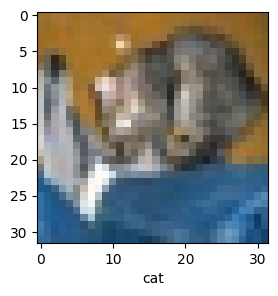

In [37]:
y_test= y_test.reshape(-1,)
plot_sample(x_test, y_test,0)

In [38]:
classes[y_pred_classes[0]]

'cat'

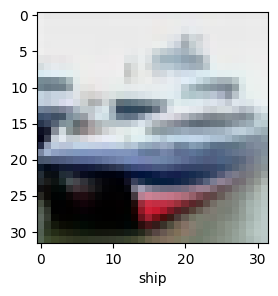

In [39]:
plot_sample(x_test, y_test,1)

In [40]:
classes[y_pred_classes[1]]

'ship'

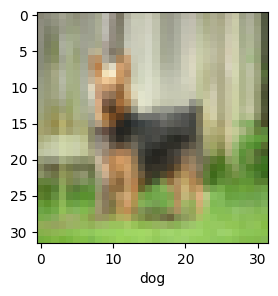

In [41]:
plot_sample(x_test, y_test,24)

In [44]:
classes[y_pred_classes[30]]

'frog'

In [ ]:
#There are wrong labels since the accuracy is only 70%